<a href="https://colab.research.google.com/github/Shadrack25/stockprediction/blob/main/stockpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 33.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import yfinance as yf

In [9]:
sp500 = yf.Ticker("^GSPC")

In [10]:
sp500 = sp500.history(period="max")

In [11]:
sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-05-17,4052.000000,4090.719971,4033.929932,4088.850098,3846580000,0,0
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,0,0
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,0,0


In [12]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-05-10', '2022-05-11', '2022-05-12', '2022-05-13',
               '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
               '2022-05-20', '2022-05-23'],
              dtype='datetime64[ns]', name='Date', length=18216, freq=None)

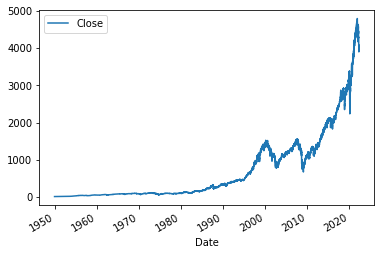

In [14]:
sp500.plot.line(y="Close", use_index=True)

In [15]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [16]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [17]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-05-17,4052.000000,4090.719971,4033.929932,4088.850098,3846580000,3923.679932
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,3900.790039
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,3901.360107


In [18]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [19]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-05-17,4052.000000,4090.719971,4033.929932,4088.850098,3846580000,3923.679932,0
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,3900.790039,0
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,3901.360107,1


In [20]:
sp500 = sp500.loc["1990-01-01":].copy()

In [21]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-17,4052.000000,4090.719971,4033.929932,4088.850098,3846580000,3923.679932,0
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,3900.790039,0
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,3901.360107,1


In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [23]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [24]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [27]:
precision_score(test["Target"], preds)

0.4444444444444444

In [28]:
combined = pd.concat([test["Target"], preds], axis=1)

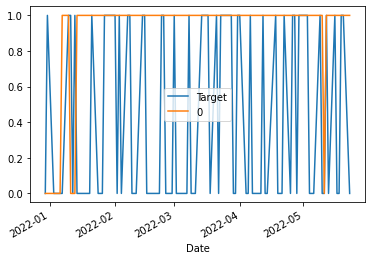

In [29]:
combined.plot()

In [30]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined


In [32]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions) 



In [33]:
predictions = backtest(sp500, model, predictors)

In [34]:
predictions["Predictions"].value_counts()

0    3321
1    2341
Name: Predictions, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5352413498504912

In [36]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.536913
0    0.463087
Name: Target, dtype: float64

In [37]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [38]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17,4052.000000,4090.719971,4033.929932,4088.850098,3846580000,3923.679932,0,1.009984,1.0,1.022928,2.0,0.946193,27.0,0.921435,132.0,1.184670,554.0
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,3900.790039,0,0.979386,1.0,0.982172,2.0,0.909308,27.0,0.884399,132.0,1.136419,553.0
2022-05-19,3899.000000,3945.959961,3876.580078,3900.790039,4212140000,3901.360107,1,0.997075,0.0,0.977876,2.0,0.905139,27.0,0.879474,131.0,1.129399,553.0


In [39]:
sp500 = sp500.dropna()

In [40]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-16,4013.020020,4046.459961,3983.989990,4008.010010,3824320000,4088.850098,1,0.998023,1.0,1.007128,2.0,0.926557,26.0,0.903160,132.0,1.161718,553.0
2022-05-17,4052.000000,4090.719971,4033.929932,4088.850098,3846580000,3923.679932,0,1.009984,1.0,1.022928,2.0,0.946193,27.0,0.921435,132.0,1.184670,554.0
2022-05-18,4051.979980,4051.979980,3911.909912,3923.679932,4428960000,3900.790039,0,0.979386,1.0,0.982172,2.0,0.909308,27.0,0.884399,132.0,1.136419,553.0


In [41]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [42]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors]) [:,1]
  preds[preds >= .6 ] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined


In [43]:
predictions = backtest(sp500, model, new_predictors)

In [44]:
predictions["Predictions"].value_counts()

0.0    3868
1.0     793
Name: Predictions, dtype: int64

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5737704918032787